In [59]:
# imports
import csv
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os

In [60]:
# read all storage folders to extract training info, i.e. markets and save it to envs
try:
    training_folders = os.listdir('storage') 
except(FileNotFoundError):
    training_folders = []
envs = {}

# while iterating create a wideform dataframe of all csv files
df_settings_dict = {}

for folder in training_folders:
    envs[folder] = {}
    # agents = folder.split("-")[0]
    if "am" in folder:
        market = "am" + folder.split("-am")[1]
        envs[folder]["market"] = market  
    elif "sm" in folder:
        market = "sm" + folder.split("-sm")[1]
        envs[folder]["market"] = market
    else:
        if folder == "3-ppo":
            envs[folder]["compare_with"] = [f for f in training_folders if folder in f]

    # read csv file (if it exists)
    print('storage/'+folder+'/log.csv')
    try:
        df_settings_dict[folder] = pd.read_csv('storage/'+folder+'/log.csv')
        # add setting to the df columns
        df_settings_dict[folder].columns = [folder + "_" + str(col) for col in df_settings_dict[folder].columns]
    except(FileNotFoundError):
        continue

# join all dataframes (one per setting)
df = pd.concat([df for df in df_settings_dict.values()], axis=1)

# init data logging 
log_data = {}

storage/3-ppo/log.csv
storage/3-ppo-mixed/log.csv
storage/3-ppo-mixed-competitive/log.csv
storage/3-ppo-percentage/log.csv
storage/3-ppo-percentage-sm/log.csv
storage/3-ppo-sm/log.csv
storage/3-ppo-sm-goal/log.csv
storage/3-ppo-sm-goal-no-reset/log.csv
storage/one-agent/log.csv
storage/three-agents/log.csv
storage/two-agents/log.csv
storage/two-agents-am/log.csv
storage/two-agents-am-goal/log.csv
storage/two-agents-mixed/log.csv
storage/two-agents-mixed-competitive/log.csv
storage/two-agents-percentage/log.csv
storage/two-agents-sm/log.csv
storage/two-agents-sm-mixed/log.csv


In [61]:
# preparation
# TODO extract all settings from storage folder!
# name of models should be:
# 1-ppo-market-setting


# init environments
# envs = {
#     "one-agent": {"agent_amount": 1},
#     "two-agents": {"agent_amount": 2},
#     "two-agents-sm": {"agent_amount": 2, "market": "sm", "counter": ["two-agents", "two-agents-am","two-agents-am-goal"]},
#     "two-agents-am": {"agent_amount": 2, "market": "am"},
#     "two-agents-am-goal": {"agent_amount": 2, "market": "am"},
#     "two-agents-sm-mixed" : {"agent_amount": 2, "setting": "mixed", "market": "sm", "counter": ["two-agents-mixed"]},
#     "two-agents-mixed": {"agent_amount": 2, "setting": "mixed"},
#     "two-agents-percentage": {
#         "agent_amount": 2, 
#         "setting":"percentage"
#     },
#     "two-agents-sm-percentage": {
#         "agent_amount": 2, 
#         "setting":"percentage", 
#         "market": "sm",
#         "counter": ["two-agents-percentage"]
#     },
#     "three-agents": {"agent_amount": 3},
#     "five-agents": {"agent_amount": 5},
#     "five-agents-percentage": {"agent_amount": 5, "setting": "percentage"},
#     "five-agents-sm": {"agent_amount": 5, "market": "sm", "counter": ["five-agents"]},
# }



In [62]:
# helper functions

def create_dataframe():
    # read files
    df_settings_dict = {}
    for setting in envs.keys():
        try:
            df_settings_dict[setting] = pd.read_csv('storage/'+setting+'/log.csv')
            # add setting to the df columns
            df_settings_dict[setting].columns = [setting + "_" + str(col) for col in df_settings_dict[setting].columns]
        except(FileNotFoundError):
            continue
    # join all dataframes (one per setting)
    df = pd.concat([df for df in df_settings_dict.values()], axis=1)
    return df

def get_frame_col(df):
    for col in df.columns:
        if "frames" in col:
            # since frames don't differ between settings, but i.e. three agents probably 
            # needs more frames pick the column that has the most values
            # (for example check if the value of the last index is not NaN)
            last_value = df[col].iloc[-1]
            if not np.isnan(last_value):
                return col

def get_longform(df, key, agent_specific=False):
    cols = extract_cols(df, key, agent_specific=agent_specific)
    # first create wideform
    df_wideform = df[cols].copy()
    # reshape dataframe into longform
    lf = convert_to_longform(df_wideform, key)
    return lf

def extract_cols(df, key, agent_specific=False):
    result_cols = [get_frame_col(df)]
    
    for col in df.columns:
        if not agent_specific:
            if key in col and key not in result_cols:
                result_cols.append(col)
        else:
            if key+"_agent_0" in col:
                # always safe agent 0 values
                result_cols.append(col)
            elif "mixed" in col and key in col:
                # always add mixed values for each agent since they differ from each other
                result_cols.append(col)
               
    # print(result_cols)
    return result_cols

def get_frames_col_name(df_cols):
    for col in df_cols:
        if "frames" in col:
            return col

def convert_to_longform(df, key):
    frames_col = get_frames_col_name(df.columns)
    print(frames_col)
    lf_df = df.melt(id_vars=[frames_col], var_name="setting", value_name=key)
    lf_df.rename(columns={frames_col:'frames'}, inplace=True)
    return lf_df

In [63]:
# df = create_dataframe()

key_mean_rewards = "mean_reward"
key_mean_trades = "mean_trades"
key_mean_reset_fields = "mean_num_reset_fields"
key_mean_grid_coloration = "mean_grid_coloration_percentage"

lf_mean_rewards = get_longform(df, key_mean_rewards, True)
lf_mean_reset_fields = get_longform(df, key_mean_reset_fields)
lf_mean_grid_coloration = get_longform(df, key_mean_grid_coloration)
lf_mean_trades = get_longform(df, key_mean_trades)

mean_reward_cols = extract_cols(df, key_mean_rewards, agent_specific=True)
mean_trade_cols = extract_cols(df, key_mean_trades)
mean_reset_field_cols = extract_cols(df, key_mean_reset_fields)
mean_grid_coloration_cols = extract_cols(df, key_mean_grid_coloration)

3-ppo_frames
3-ppo_frames
3-ppo_frames
3-ppo_frames


18


<AxesSubplot:xlabel='frames', ylabel='mean_trades'>

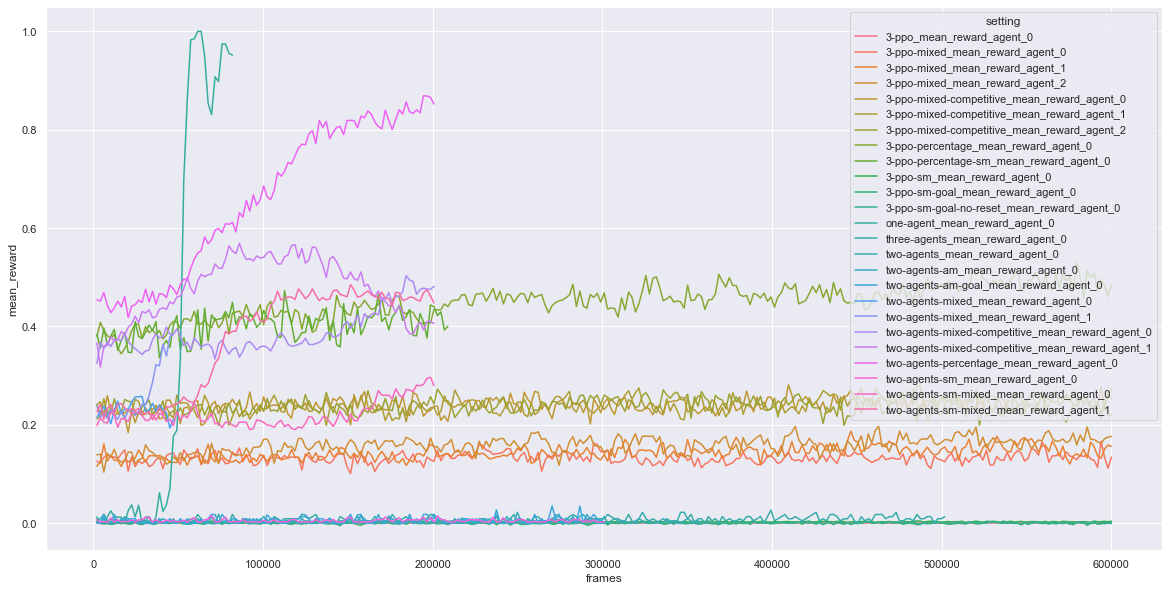

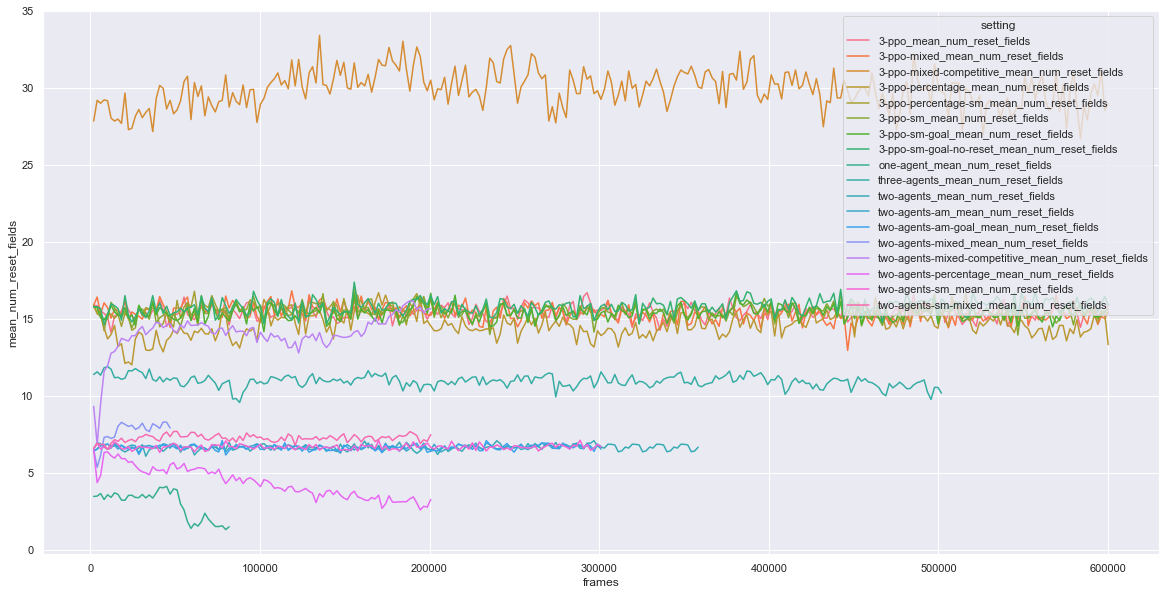

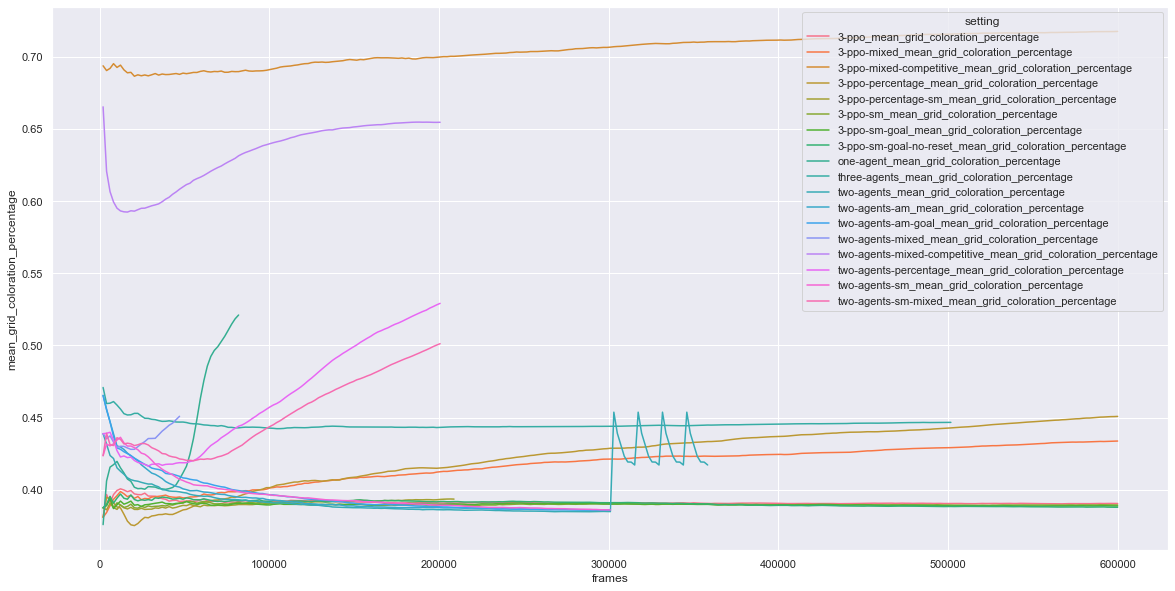

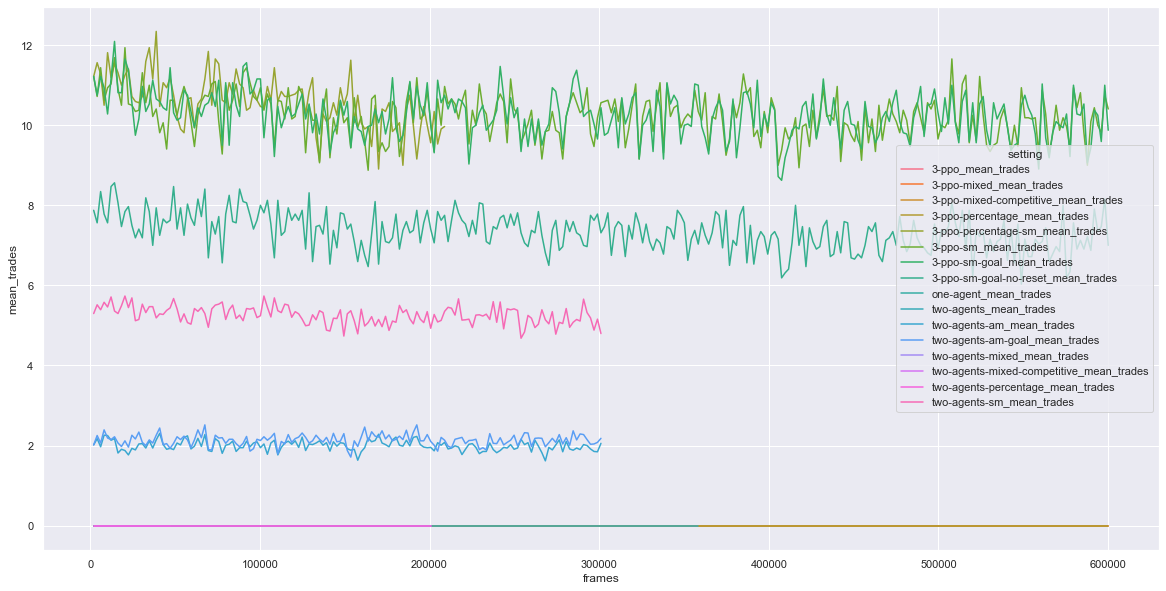

In [64]:
sns.set_theme(style="darkgrid")
print(len(envs))
sns.color_palette("tab10")

plt.figure(figsize=(20,10))
# Plot the responses for different events and regions
sns.lineplot(x="frames", y=key_mean_rewards,
             hue="setting",
             data=lf_mean_rewards)

plt.figure(figsize=(20,10))
# Plot the responses for different events and regions
sns.lineplot(x="frames", y=key_mean_reset_fields,
             hue="setting",
             data=lf_mean_reset_fields)

plt.figure(figsize=(20,10))
# Plot the responses for different events and regions
sns.lineplot(x="frames", y=key_mean_grid_coloration,
             hue="setting",
             data=lf_mean_grid_coloration)

plt.figure(figsize=(20,10))
# Plot the responses for different events and regions
sns.lineplot(x="frames", y=key_mean_trades,
             hue="setting",
             data=lf_mean_trades)

In [69]:
def multiplot(setting, key):
    sns.set_theme(style="dark")

    # print(market_settings)
    for index, columns in enumerate(setting):
        if not any("frames" in setting_col for setting_col in columns):
            print("adding frames")
            # print(setting)
            columns.append(get_frame_col(df))
        df_comparison = df[columns].copy()
        # print(df_market.columns)
        lf_comparison = convert_to_longform(df_comparison, key)
        print(lf_comparison.columns)
        # sns.set_theme(style="darkgrid")

        # Plot each year's time series in its own facet
        g = sns.relplot(
            data=lf_comparison,
            x="frames", y=key, col="setting", hue="setting",
            kind="line", palette="crest", linewidth=4, zorder=5,
            col_wrap=2, height=5, aspect=3, legend=False,
        )

        # Iterate over each subplot to customize further
        for s, ax in g.axes_dict.items():

            # Add the title as an annotation within the plot
            ax.text(.8, .85, s, transform=ax.transAxes, fontweight="bold")

            # Plot every year's time series in the background
            sns.lineplot(
                data=lf_comparison, x="frames", y=key, units="setting",
                estimator=None, color=".7", linewidth=1, ax=ax,
            )

        # Reduce the frequency of the x axis ticks
        ax.set_xticks(ax.get_xticks()[::2])

        # Tweak the supporting aspects of the plot
        g.set_titles("")
        g.set_axis_labels("", key)
        g.tight_layout()

3-ppo_frames
Index(['frames', 'setting', 'mean_reward'], dtype='object')
adding frames
3-ppo_frames
Index(['frames', 'setting', 'mean_trades'], dtype='object')
3-ppo_frames
Index(['frames', 'setting', 'mean_num_reset_fields'], dtype='object')
3-ppo_frames
Index(['frames', 'setting', 'mean_grid_coloration_percentage'], dtype='object')


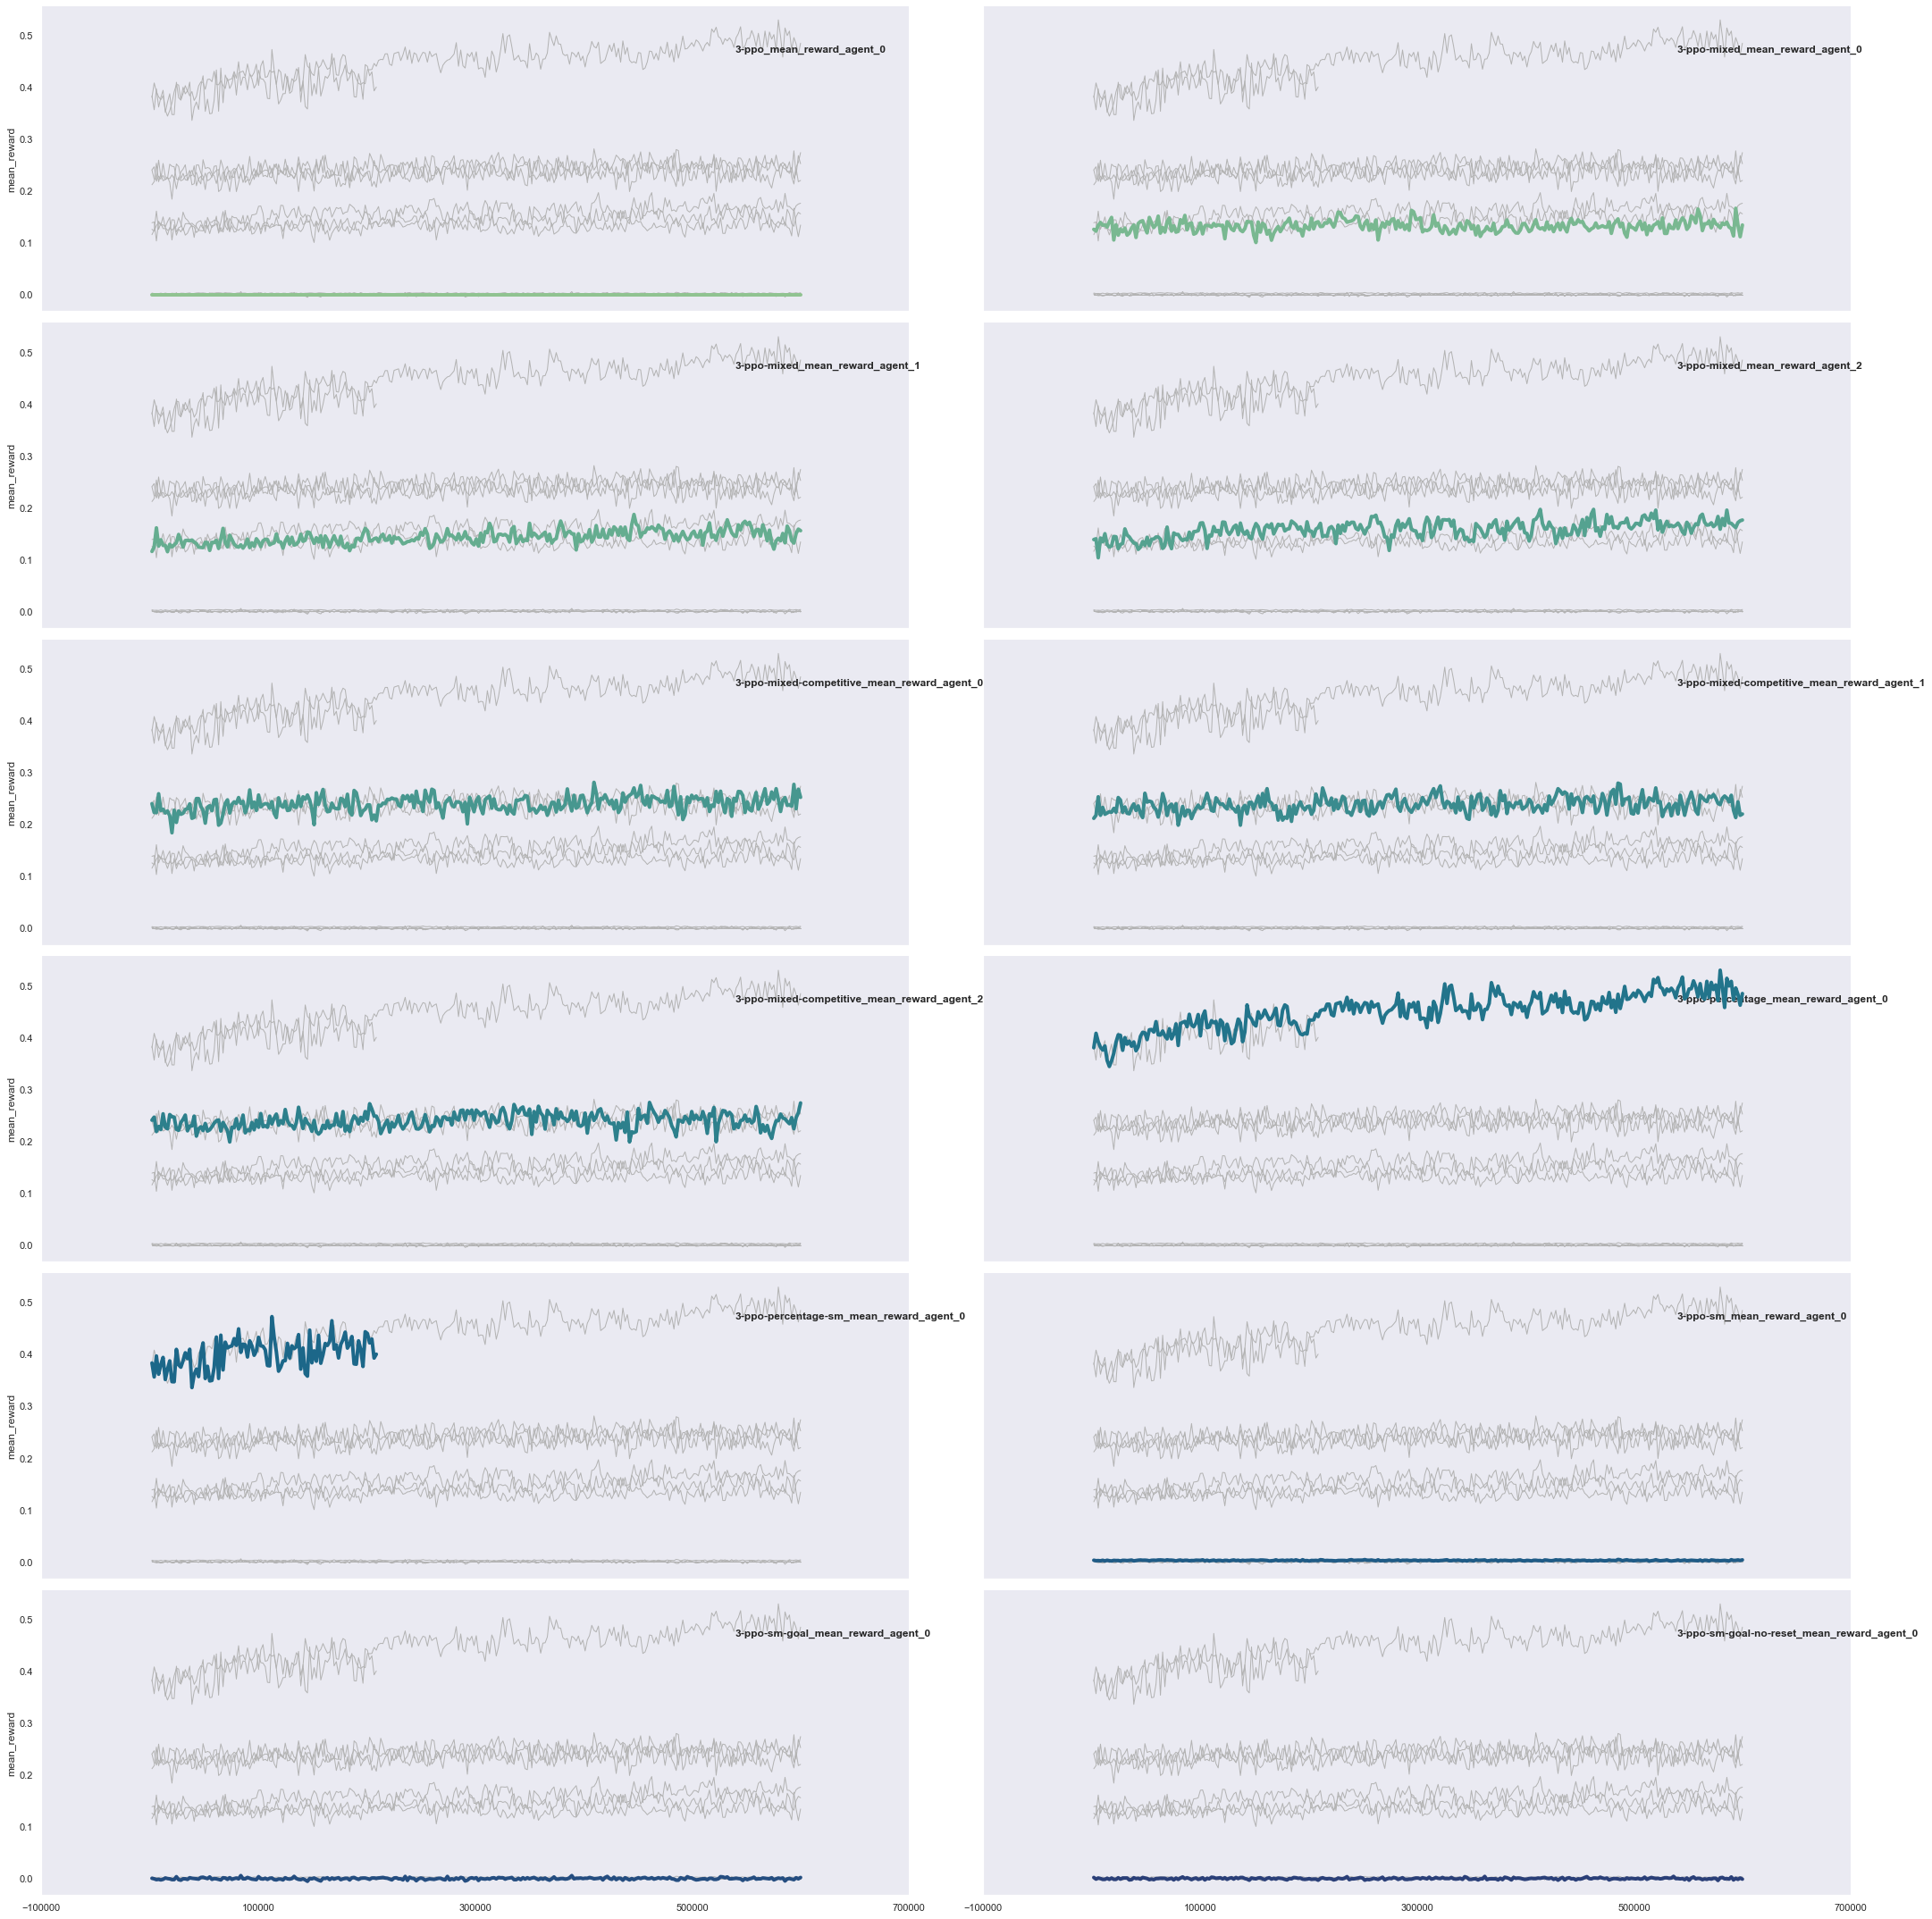

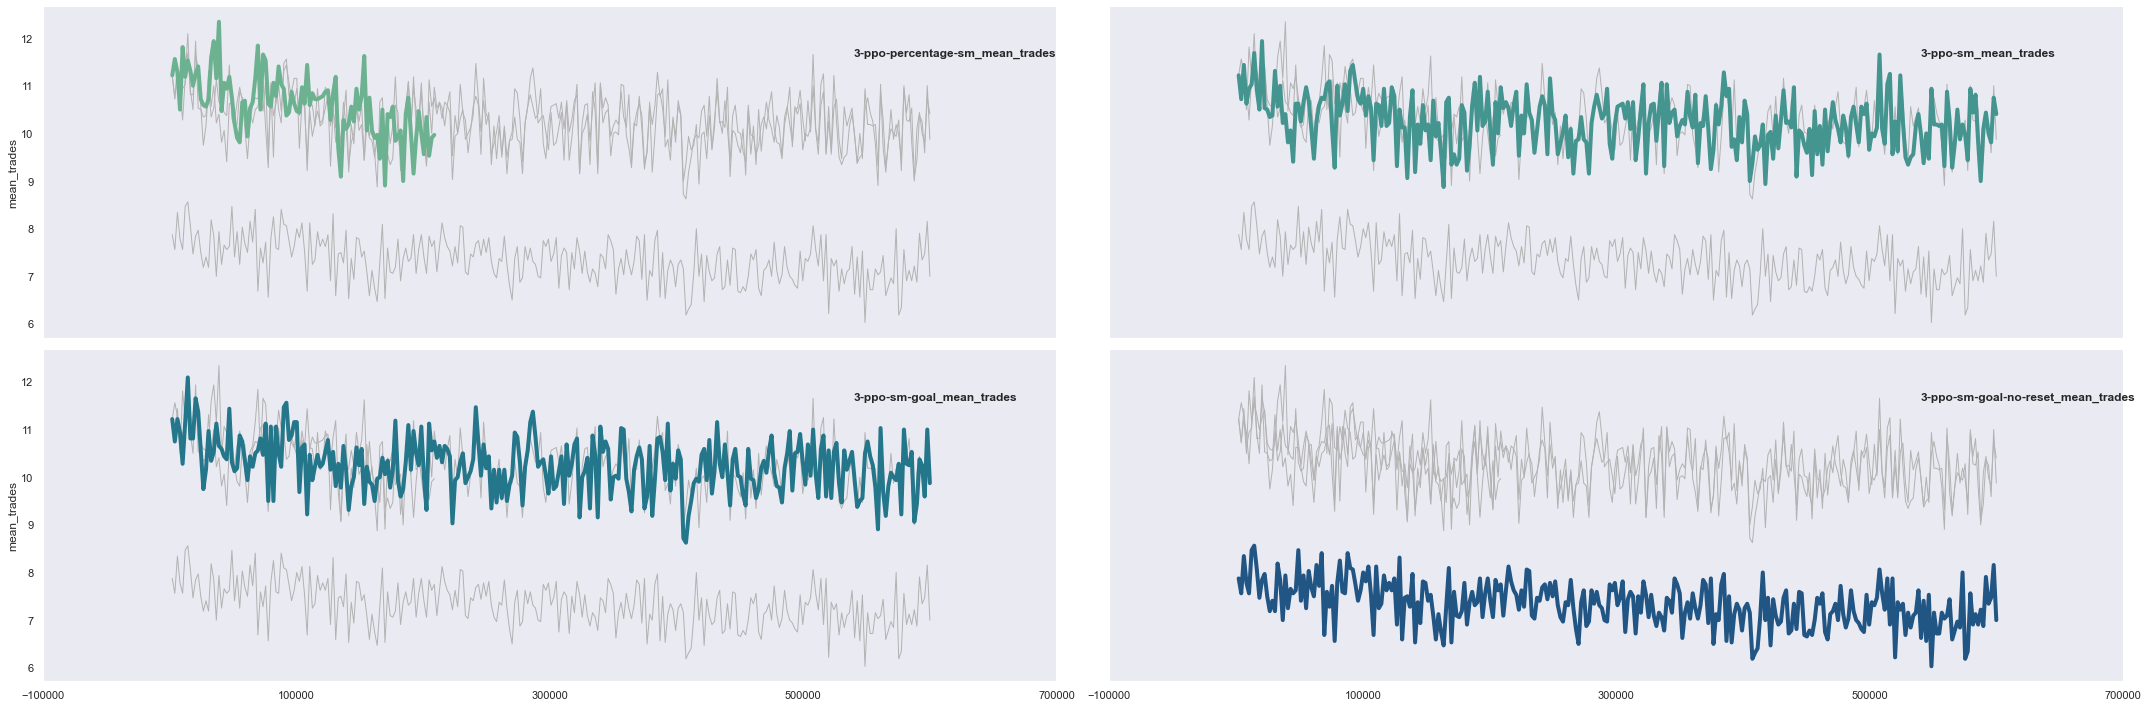

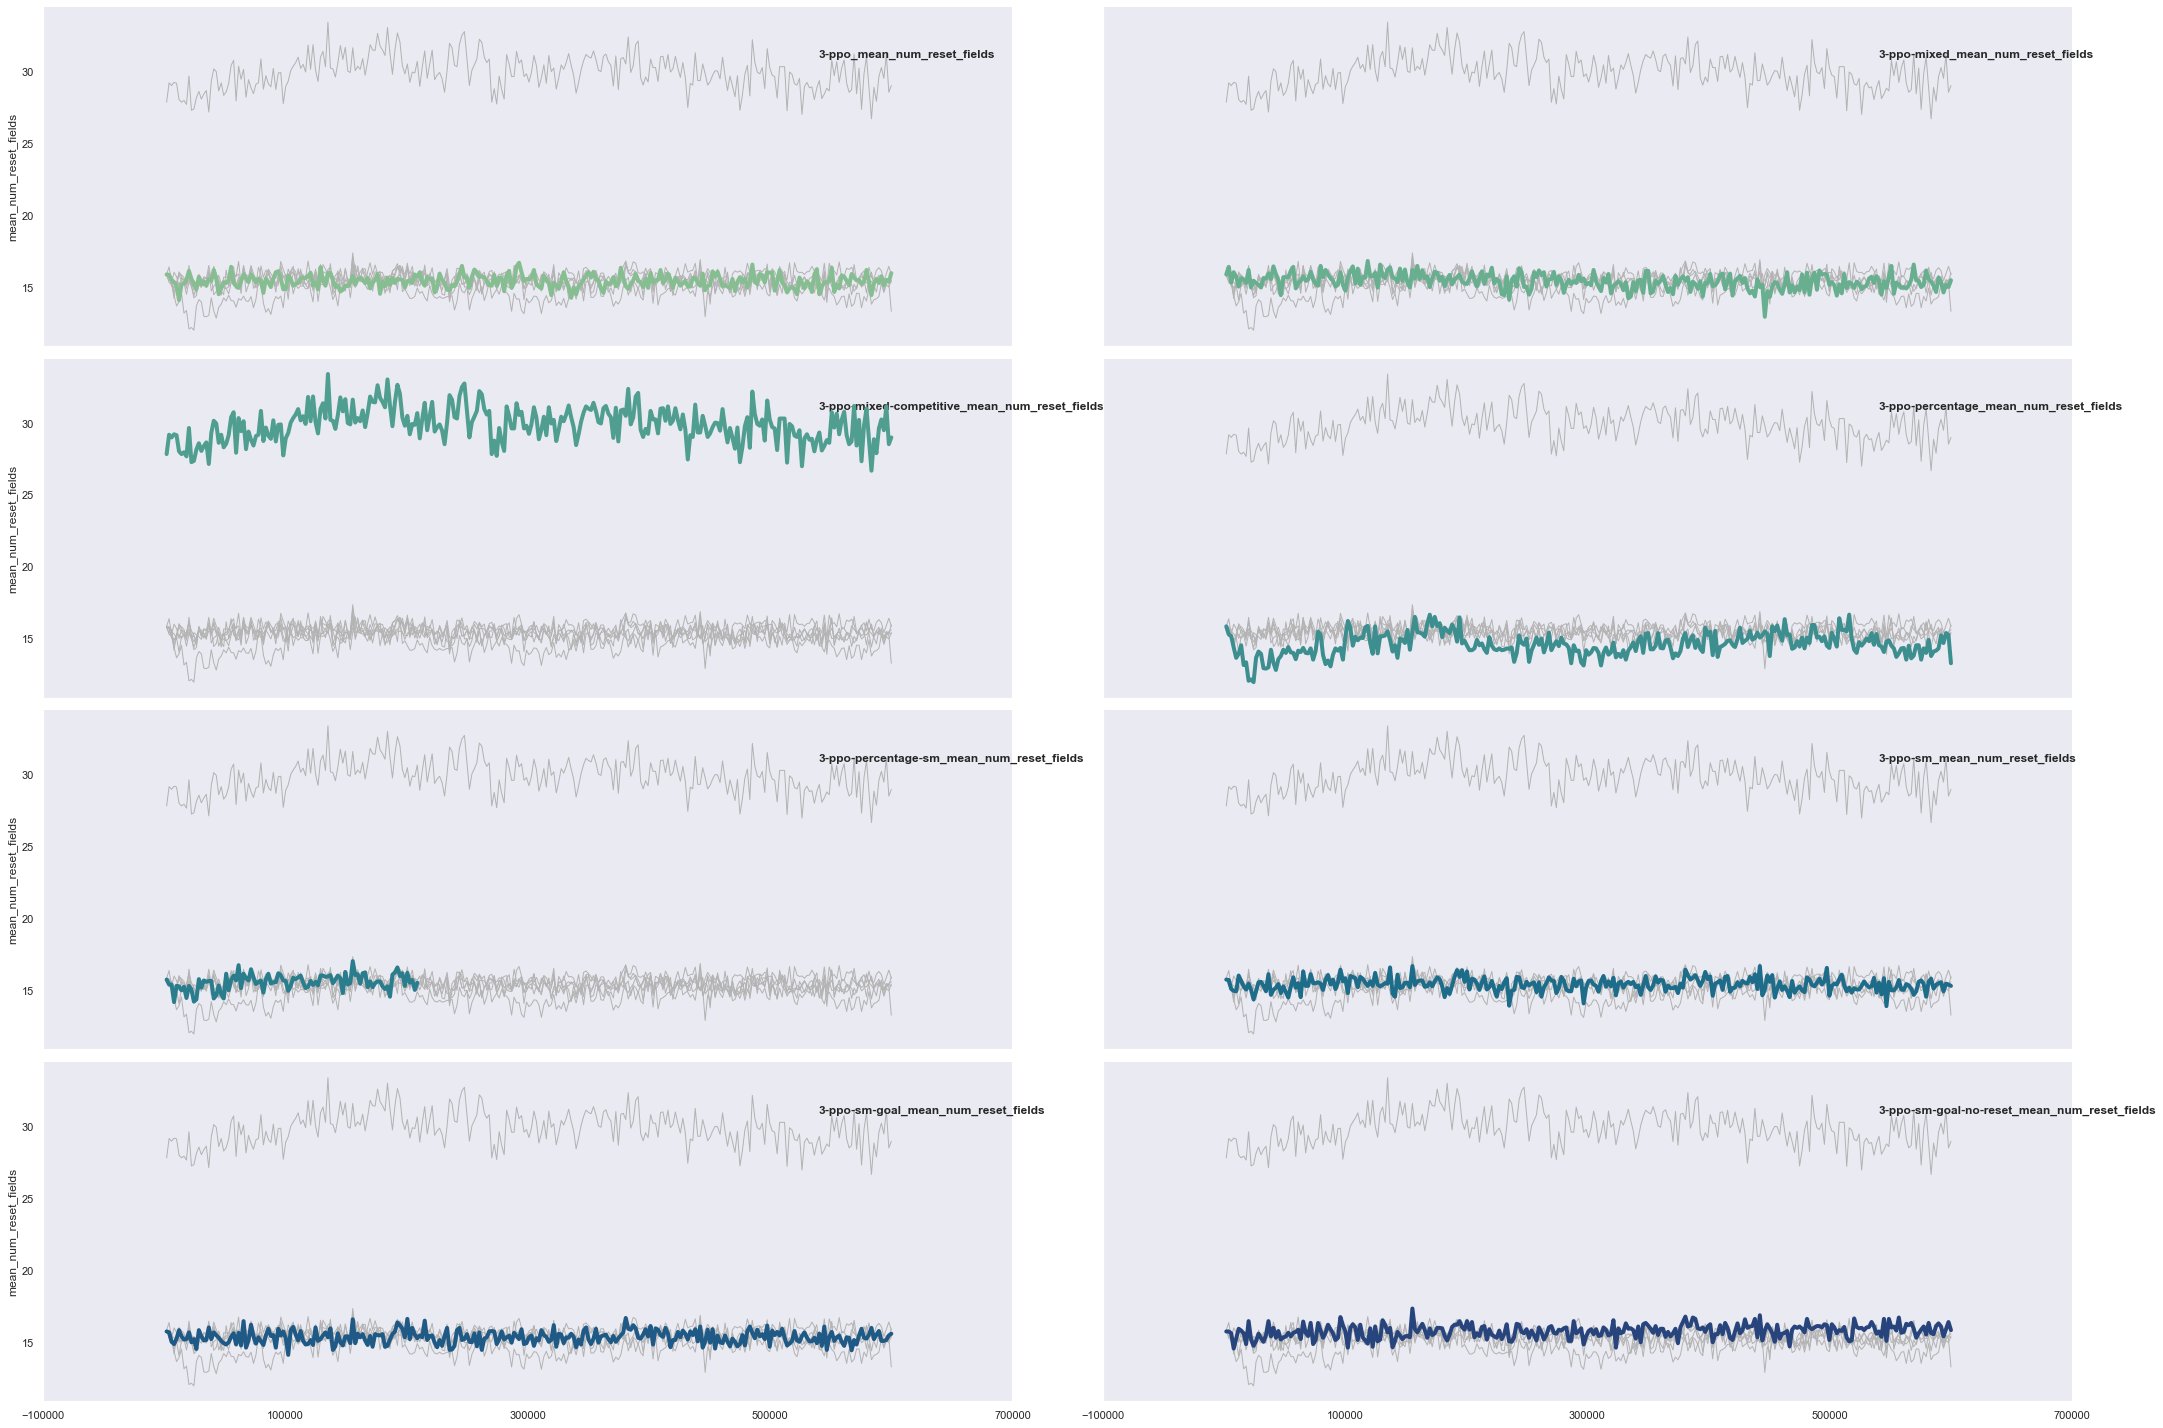

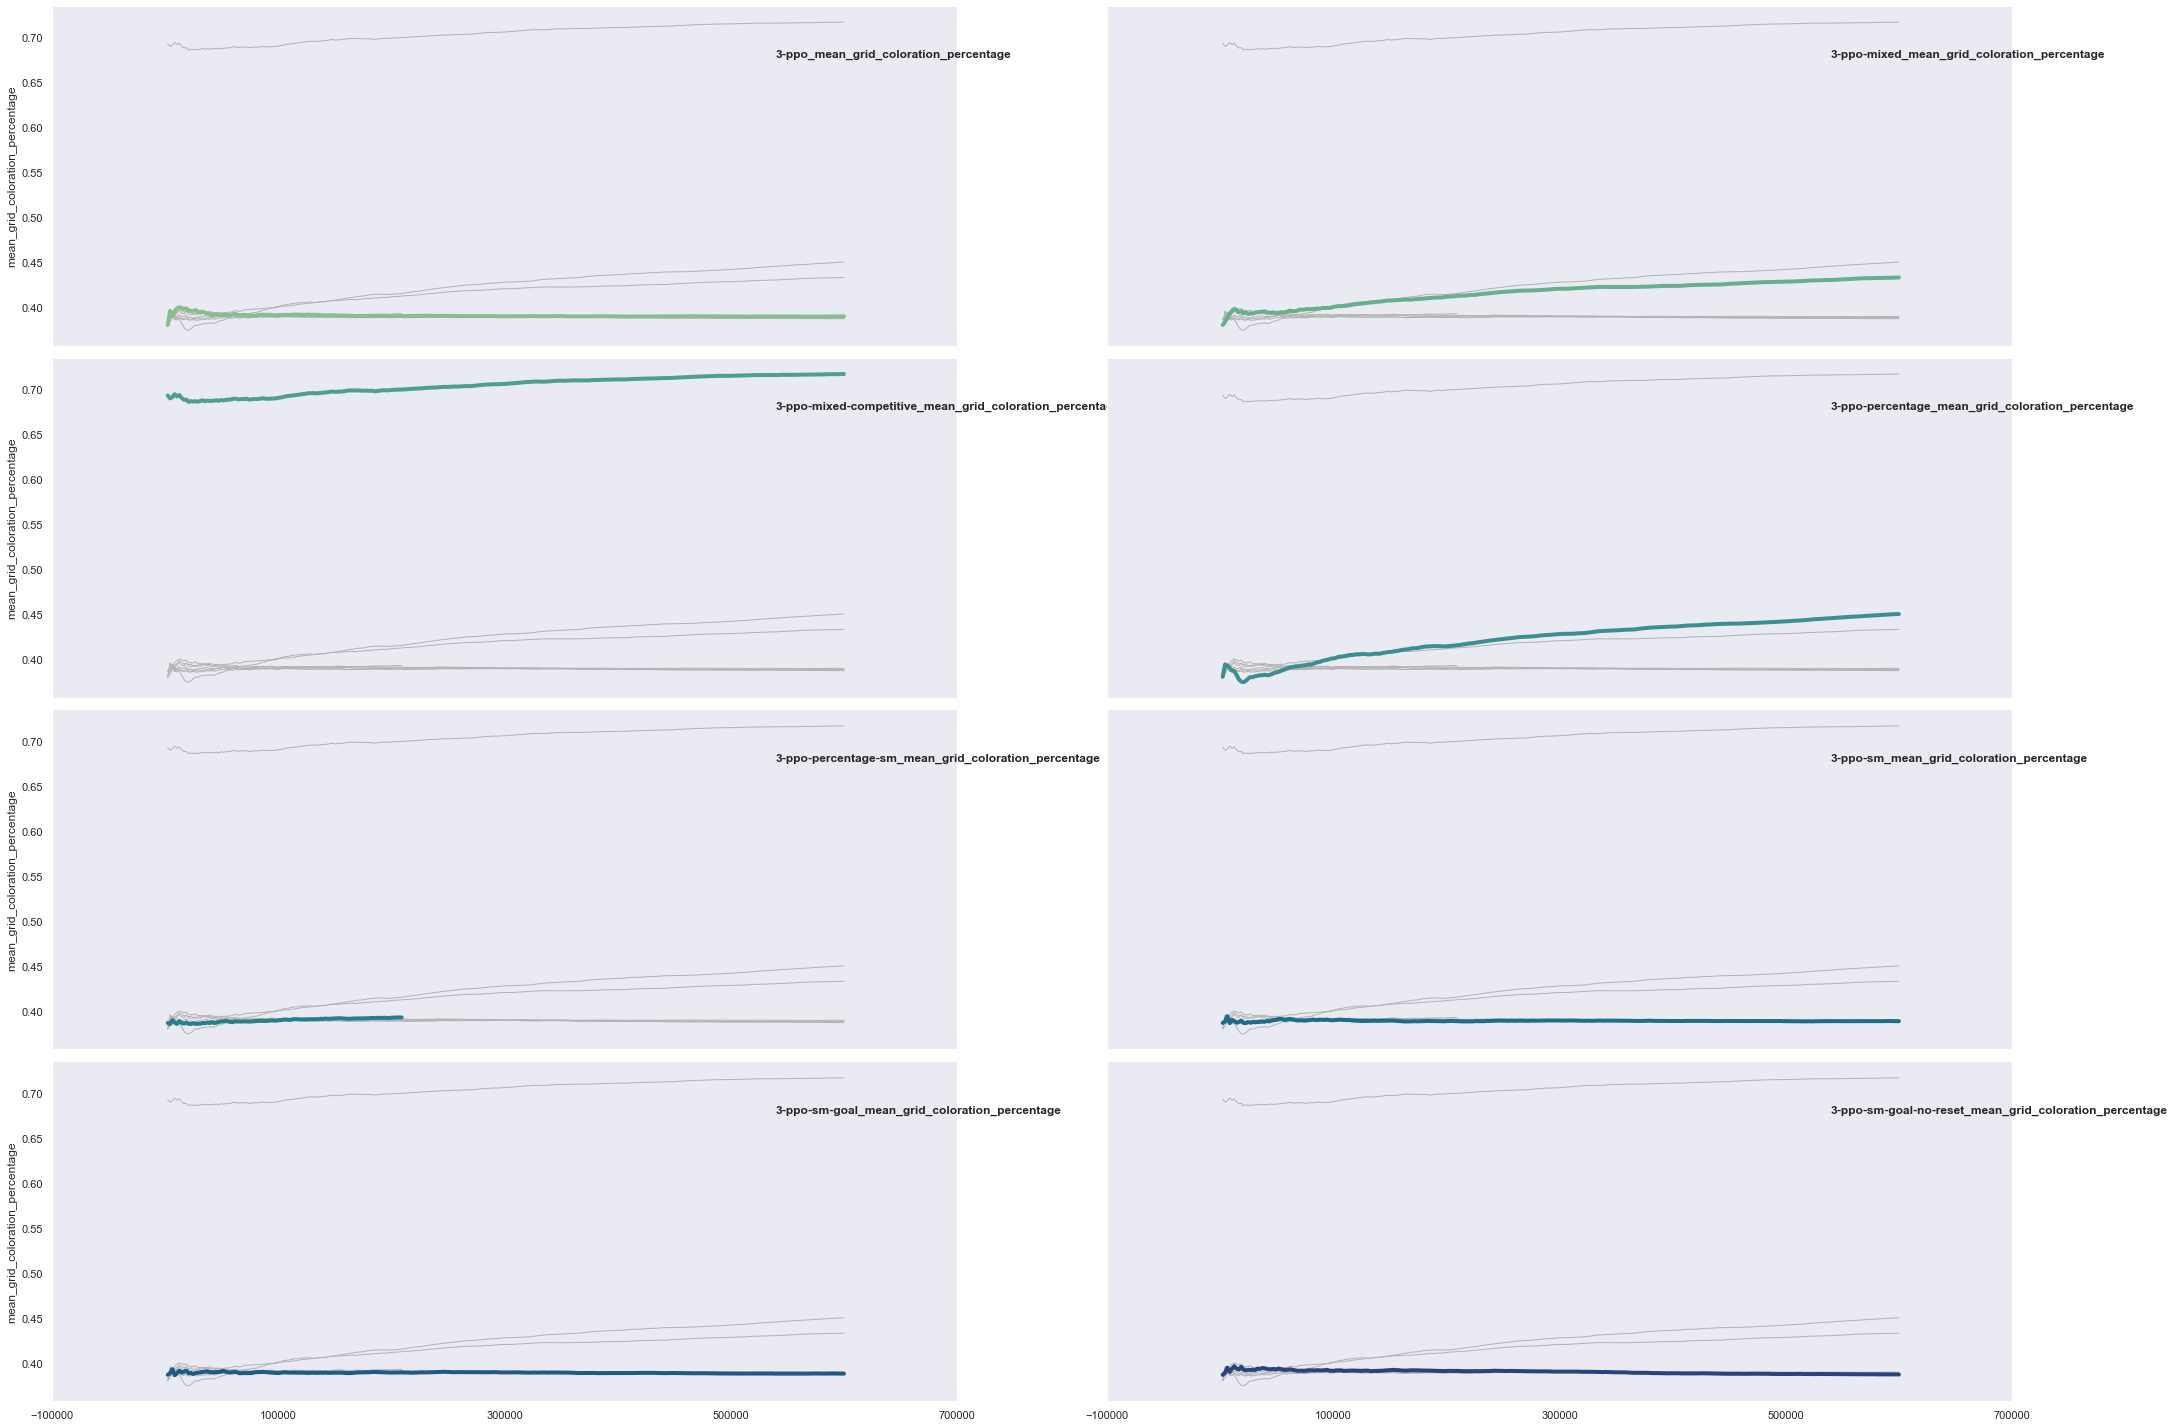

In [70]:
compare_rewards = []
compare_trades = []
compare_reset_fields = []
compare_grid_coloration = []
for key, env_settings in envs.items():
    if "compare_with" in env_settings:
        comparisons = env_settings["compare_with"]
        compare_rewards.append([i for i in mean_reward_cols for counter in comparisons if counter+"_" in i])
        compare_trades.append([i for i in mean_trade_cols for counter in comparisons if ("am" in counter or "sm" in counter) and counter+"_" in i])
        compare_reset_fields.append([i for i in mean_reset_field_cols for counter in comparisons if counter+"_" in i])
        compare_grid_coloration.append([i for i in mean_grid_coloration_cols for counter in comparisons if counter+"_" in i])

multiplot(compare_rewards, key_mean_rewards)
multiplot(compare_trades, key_mean_trades)
multiplot(compare_reset_fields, key_mean_reset_fields)
multiplot(compare_grid_coloration, key_mean_grid_coloration)

3-ppo_frames


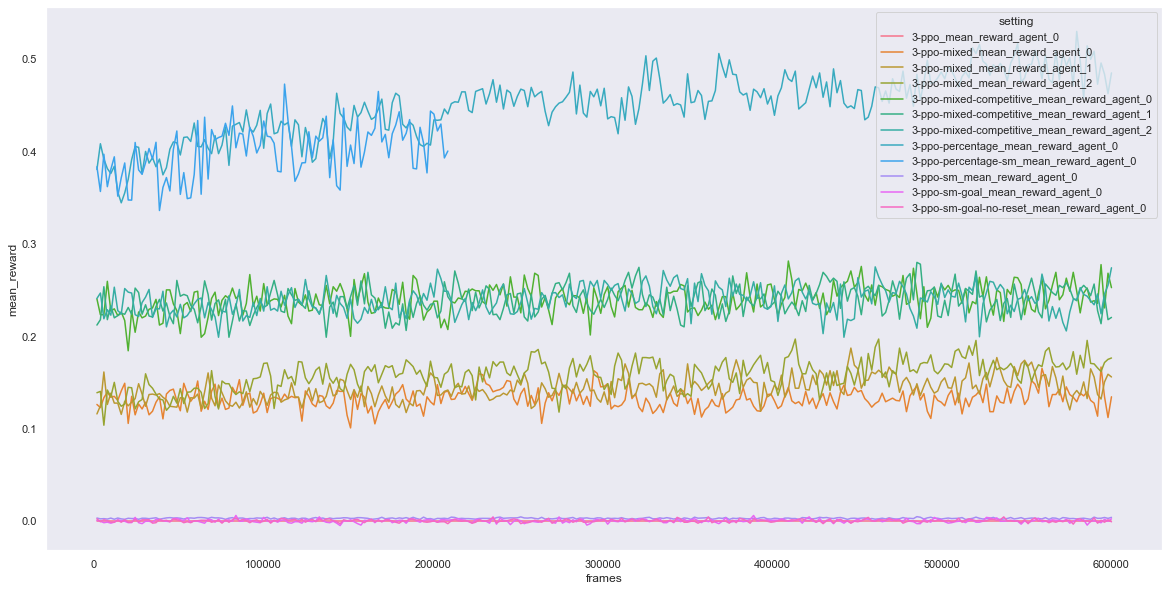

In [67]:
market_settings = []
for key, env_settings in envs.items():
    if "compare_with" in env_settings:
        reward_cols = [i for i in mean_reward_cols for counter in env_settings["compare_with"] if counter+"_" in i]
        market_settings.append(reward_cols)


for index, setting in enumerate(market_settings):
    if not any("frames" in setting_col for setting_col in setting):
        setting.append(get_frame_col(df))
    df_market = df[setting].copy()
    lf_market = convert_to_longform(df_market, key_mean_rewards)
    # sns.set_theme(style="darkgrid")

    plt.figure(index, figsize=(20,10))
    # Plot the responses for different events and regions
    sns.lineplot(x="frames", y=key_mean_rewards,
                hue="setting",
                data=lf_market)